In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the `comb.img` file. Strip the first 512 header bytes and then convert the remaining
# 512x512 bytes first to integer and then store the result in a numpy array
IMG_PATH = 'comb.img'

with open(IMG_PATH, 'rb') as f:
    header = f.read(512)
    
    img_values = []
    for _ in range(512*512):
        img_values.append(ord(f.read(1)))
        
    B = np.array(img_values, dtype=np.uint8)
    B = B.reshape((512, 512))

In [3]:
def plot_img(img, name):
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.savefig(fname=f"{name}.png", dpi=120, pad_inches=0, bbox_inches='tight')

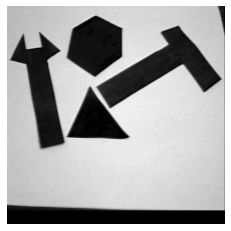

In [4]:
plot_img(B, "B")

In [5]:
# 1. Threshold the image using threshold value T = 128 to generate a binary image B_T
B_T = B <= 128
B_T = B_T.astype(dtype=np.ubyte)

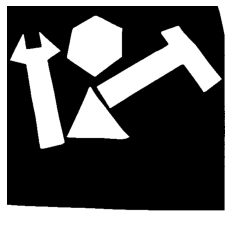

In [6]:
plot_img(B_T, "B_T")

In [7]:
# 2. Determine the connected components in B_T using the iterative connected component
# labeling (CCL) algorithm
def ccl(img, size):
    visited = np.zeros_like(img)
    components = []
    R, C = img.shape[0], img.shape[1]

    for i in range(R):
        for j in range(C):
            if visited[i,j] == 0:
                visited[i,j] = 1
                
                if img[i,j] == 0:
                    continue
                
                pixels = [(i,j)]
                nodes = [(i,j)]
                while len(nodes) != 0:
                    node = nodes.pop()
                    r, c = node[0], node[1]
                    visited[r,c] = 1
                    
                    if r > 0 and visited[r-1,c] == 0 and img[r-1,c] == 1:
                        nodes.append((r-1,c))
                        pixels.append((r-1,c))
                    if r < R-1 and visited[r+1,c] == 0 and img[r+1,c] == 1:
                        nodes.append((r+1,c))
                        pixels.append((r+1,c))
                    if c > 0 and visited[r,c-1] == 0 and img[r,c-1] == 1:
                        nodes.append((r,c-1))
                        pixels.append((r,c-1))
                    if c < C-1 and visited[r,c+1] == 0 and img[r,c+1] == 1:
                        nodes.append((r,c+1))
                        pixels.append((r,c+1))
                
                if len(pixels) >= size:
                    # Area
                    area = len(pixels)
                    
                    # Centroid
                    center_x, center_y = 0, 0
                    for x,y in pixels:
                        center_x, center_y = center_x + x, center_y + y
                    center_x, center_y = center_x // area, center_y // area
                    
                    # Bounding box
                    min_x, max_x = 255, 0
                    min_y, max_y = 255, 0
                    for x, y in pixels:
                        if   x < min_x: min_x = x
                        elif x > max_x: max_x = x

                        if   y < min_y: min_y = y
                        elif y > max_y: max_y = y
                        
                    box_coords = [
                        (min_x, min_y),
                        (max_x, min_y),
                        (min_x, max_y),
                        (max_x, max_y)
                    ]
                    
                    # Axis of elongation
                    
                    # Eccentricty
                    
                    # Perimeter
                    
                    # Compactness (perimeter**2 / area)

                    components.append((pixels,
                                       area,
                                       (center_x, center_y),
                                       box_coords,))

    return components
    
components = ccl(B_T, 2000)

In [8]:
def plot_components(img, components):
    out = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    colors = [
        # [0,0,0],
        [255,0,0],
        [165,42,42],
        [255,255,0],
        [0,255,0],
        [0,0,255],
        [113,126,142],
    ]
    color_index = 0
    
    for comp in components:
        pixels = comp[0]
        for x, y in pixels:
            out[x,y] = colors[color_index]
        color_index += 1
            
    plt.figure(figsize=(10,10))
    plt.imshow(out)

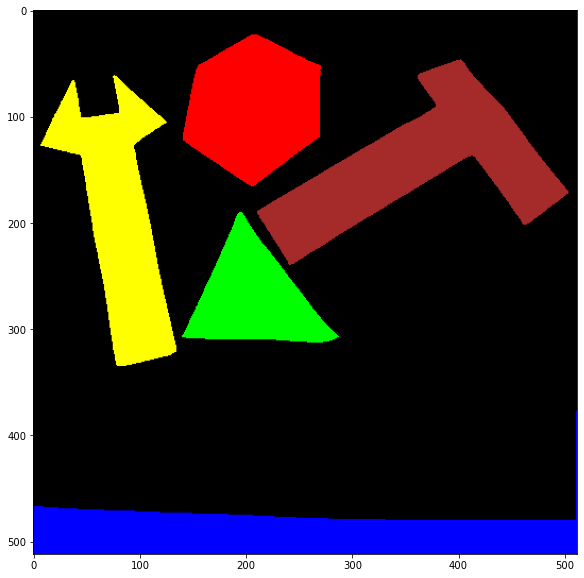

In [9]:
plot_components(B_T, components)